In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Accuracy, Precision
from sklearn.metrics import accuracy_score,precision_score
import cv2
from skimage import color
from tensorflow.keras.applications.resnet50 import decode_predictions
import os

### Ogólny wgląd na dane

In [215]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [216]:
mnist_data['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Liczba jest równa 0
Jej reprezentacja jako obrazu to AxesImage(80,52.8;496x369.6)


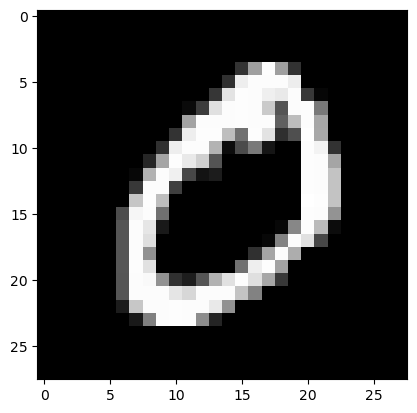

In [217]:
print('Liczba jest równa {}'.format(mnist_data['target'][1]))
print('Jej reprezentacja jako obrazu to {}'.format(plt.imshow(mnist_data['data'].values[1].reshape(28,28),cmap='gray')))

### Budowanie modelu 

In [218]:
model=keras.Sequential()
model.add(keras.layers.Dense(1000,activation='relu',input_shape=(28*28,)))
model.add(keras.layers.Dense(250,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(10,activation='Softmax'))
model.compile('adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [219]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              785000    
                                                                 
 dense_15 (Dense)            (None, 250)               250250    
                                                                 
 dense_16 (Dense)            (None, 100)               25100     
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
Total params: 1,065,910
Trainable params: 1,065,910
Non-trainable params: 0
_________________________________________________________________
None


In [220]:
X=[mnist_data['data'].values[x].reshape(784,) for x in range(mnist_data['data'].shape[0])]
y=mnist_data['target'].astype(int)

X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=41,test_size=0.1)
X_train=np.array(X_train)

In [221]:
model.fit(X_train,y_train,epochs=10)
#dokładność modelu na poziomie 98.7%

Epoch 1/10
1969/1969 [==============================] - 20s 9ms/step - loss: 0.5886 - accuracy: 0.9092
Epoch 2/10
1969/1969 [==============================] - 17s 8ms/step - loss: 0.1755 - accuracy: 0.9520
Epoch 3/10
1969/1969 [==============================] - 17s 8ms/step - loss: 0.1414 - accuracy: 0.9616
Epoch 4/10
1969/1969 [==============================] - 18s 9ms/step - loss: 0.1088 - accuracy: 0.9700
Epoch 5/10
1969/1969 [==============================] - 18s 9ms/step - loss: 0.0967 - accuracy: 0.9744
Epoch 6/10
1969/1969 [==============================] - 19s 10ms/step - loss: 0.0805 - accuracy: 0.9780
Epoch 7/10
1969/1969 [==============================] - 20s 10ms/step - loss: 0.0718 - accuracy: 0.9809
Epoch 8/10
1969/1969 [==============================] - 18s 9ms/step - loss: 0.0636 - accuracy: 0.9832
Epoch 9/10
1969/1969 [==============================] - 17s 9ms/step - loss: 0.0580 - accuracy: 0.9849
Epoch 10/10
1969/1969 [==============================] - 19s 10ms/step 

###  Sprawdzanie skuteczności modelu na niewidzianych danych

In [222]:
y_pred=model.predict(np.array(X_test))
y_pred=np.array([np.where(elem==elem.max())[0][0] for elem in y_pred])
y_test=np.array(y_test)

def score(y_test,y_pred):
    wynik=0
    cal=len(y_test)
    for elem in y_pred:
        if y_pred[elem]==y_test[elem]:
            wynik=wynik+1
    return (wynik/cal)*100
print('Skuteczność modelu na danych testowych: {}%'.format(score(y_test,y_pred)))

219/219 [==============================] - 3s 3ms/step
Skuteczność modelu na danych testowych: 100.0%


In [223]:
model.predict(np.array(X_test))[850].max()

219/219 [==============================] - 3s 3ms/step


0.9907085

### Zapisywanie modelu

In [224]:
model.save('rozponawanie_liczb.h5')
mój_model=load_model('rozponawanie_liczb.h5')

[2]


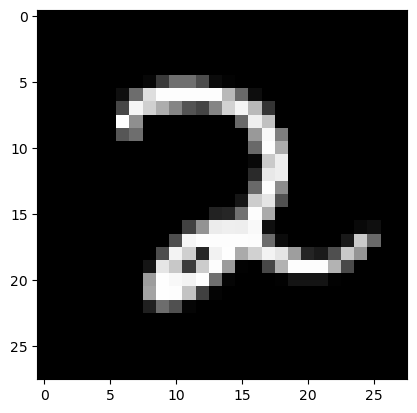

In [225]:
print(wynik[22])
plt.imshow(X_test[22].reshape(28,28),cmap='gray')

### Budowanie algorytmu rozpoznającego liczby które napiszemy

In [226]:
def detect(obraz):
    maxy=0
    wynik=model.predict(np.array([obraz]))
    wynik=list(wynik.reshape(wynik.shape[0]*wynik.shape[1],))
    for el in wynik:
        if el>maxy:
            maxy=el
    suma=0
    for elem in wynik:
        if elem !=maxy:
            suma=suma+1
        if elem ==maxy:
            suma_ost=suma
    return suma_ost

In [ ]:
def menu(img=0):
    print('#' * 100)
    print('    1. Wyjaśnienie działania programu')
    print('    2. Wczytaj obraz')
    print('    3. Start')
    print('    4. Wyświetl wybrany obraz')
    print('    5. Wyjdź')
    print('#' * 100)
    x = int(input('    '))
    if x == 1:
        print(
            'Wczytaj z wybranego foldera (Cyfry) obraz o rozmiarze 28x28, następnie wybierz "Start" i zobacz czy program przewidział twoją liczbę')
        q = input('Wpisz "q" żeby wyjść')
        if q == 'q':
            menu()
    if x == 2:
        # ustawienie ścieżki do foldera
        path = "C:/Users/ADMIN/Desktop/Cyfry"
        images = os.listdir(path)
        # wyświetlenie dostępnych plików
        print('Lista dostępnuch plików: ')
        index = 0
        slownik = {}
        for elem in images:
            print('{}. {}'.format(index, elem))
            slownik[index] = elem
            index = index + 1
        # wybranie pliku do detekcji
        x = int(input('Wybierz numer pliku: \n'))
        wybrane = slownik[x]
        print('Wybrany plik: {}\n'.format(wybrane))
        # wczytanie pliku
        img = cv2.imread(path + '/' + wybrane)

        menu(img=img)
    if x == 3:
        img = color.rgb2gray(img)
        img = np.array((img * 255).reshape(784, ))
        print('Przewidziana liczba to: {}'.format(detect(img)))
        # pierwsze funkcja która przerobi odebrany obraz na odpowiednie rozmiary i przewidzi wynik
        # potem funckcja która pokaże jaka to liczba
        menu(img=img)
    if x == 4:
        plt.imshow(img)
        plt.show()
        q = input('Wpisz "q" żeby wrócić do menu: ')
        if q == 'q':
            menu()
menu()

####################################################################################################
    1. Wyjaśnienie działania programu
    2. Wczytaj obraz
    3. Start
    4. Wyświetl wybrany obraz
    5. Wyjdź
####################################################################################################


### Funkcja którą można włączyć w terminalu jest dostępna w pliku https://github.com/KubaMieszczak/Programming/blob/main/Number%20Detector/number_detector.py na github